# Problem Set 1: The case of the dead sand mouse

### Part 1
Start by opening the text files and reading each line. For each line, parse the line into a list of strings for the parts we care about and then add the list to a main list to create a 2d list of strings for each text file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import my_functions as mf
import math 
%matplotlib inline

def get_k_largest(array, k):
    """Takes in a 1d numpy array and gives back
    an array of indexes of the k largest elements"""
    
    idxs = np.argpartition(array,-k)
    return idxs[-k:]
    

# Open the text files
ms1 = open("Moriarty_SuppTable1.txt")
as2 = open("Adler_SuppTable2.txt")

ms1_list = []
as2_list = []

# Read the files line by line, parsing each line and adding it to
# the list of strings
for line in ms1:
    if line[0] == '#': continue 
    line = line.rstrip('\n')      
    line = line.split()
    ms1_list.append(line)

for line in as2:
    if line[0] == '#': continue
    line = line.rstrip('\n')      
    line = line.split()
    as2_list.append(line)
    
# Close the files
ms1.close()
as2.close()
    

Now, we can use the lists  we created in the previous step to create a numpy array containing the gene names and a numpy array containing the data for each list. Within each set of two arrays, the gene names and their corresponding data are linked by sharing the same index within their arrays. This will allow us to access the gene name associated with a piece of data that we find interesting, and vice versa.

In [2]:
# Create numpy arrays of the names    
ms1_names = np.asarray([i[0] for i in ms1_list])
as2_names = np.asarray([i[0] for i in as2_list])

# Grab the data portions of the list and create a numpy array of type 
# float
ms1_data = np.asarray([i[1:len(ms1_list[1])] for i in ms1_list])
ms1_data = ms1_data.astype(np.float)

as2_data = np.asarray([i[1:len(as2_list[1])] for i in as2_list])
as2_data = as2_data.astype(np.float)

# Check to make sure the arrays have the expected dimensions
print(ms1_data.shape)
print(as2_data.shape)

(20031, 5)
(20031, 2)


Now we create an array of gene names that are in `ms1_names` but not in `as2_names`.

In [3]:
# Get an array of names that appear in ms1 but not as2
extra_names = np.setdiff1d(ms1_names, as2_names)
print("There are " + str(len(extra_names)) + " non-matching names in Maoriarties dataset" + 
      "\nThe non-matching names are:\n" + str(extra_names))

There are 26 non-matching names in Maoriarties dataset
The non-matching names are:
['1-Dec' '1-Mar' '1-Sep' '10-Mar' '10-Sep' '11-Mar' '11-Sep' '12-Sep'
 '14-Sep' '15-Sep' '2-Mar' '2-Sep' '3-Mar' '3-Sep' '4-Mar' '4-Sep' '5-Mar'
 '5-Sep' '6-Mar' '6-Sep' '7-Mar' '7-Sep' '8-Mar' '8-Sep' '9-Mar' '9-Sep']


We see that there are 26 gene names in Moriarty's data that do not appear in Adler's data. Taking a closer look at those gene names, it appears that Moriarty's data was indeed affected by the Excel default naming settings that turn gene names into dates, thus irreversibly corrupting those gene names. 

### Part 2
Next, we will find the five genes with the highest mRNA synthesis rates, longest mRNA half lifes, and highest ratio of expression at t=96 vs t=0 hours using the numpy arrays we created in the previous part. Here I use a function I wrote called `get_k_largest` that returns the indexes of the k-largest elements of a 1d numpy array. Using these indices, I got the genes of interest along with their data of interest and put them into one 2d array together. This was done for each of the 3 metrics that we cared about.

In [4]:
# Calculate the expression ratios and store as a column vector
expr_ratios_96 = np.divide(ms1_data[:,4], ms1_data[:,0])

# Get the largest element for each data we care about and concatenate
# the columns to get a column of the gene name and a column of the data
# associated with that gene name for each data type
highest_synth_idxs = get_k_largest(as2_data[:,0], 5)
longest_hl_idxs = get_k_largest(as2_data[:,1], 5)
highest_expr_ratio_idxs = get_k_largest(expr_ratios_96[:,], 5)

highest_synth_names = as2_names[highest_synth_idxs[:],].reshape(5,1)
highest_synth_rates = as2_data[highest_synth_idxs[:],0].reshape(5,1)
highest_synth_genes = np.concatenate((highest_synth_names, highest_synth_rates), axis=1)

longest_hl_names = as2_names[longest_hl_idxs[:],].reshape(5,1)
longest_hl_times = as2_data[longest_hl_idxs[:],1].reshape(5,1)
longest_hl_genes = np.concatenate((longest_hl_names, longest_hl_times), axis=1)

highest_expr_ratio_names = ms1_names[highest_expr_ratio_idxs[:],].reshape(5,1)
highest_expr_ratio_nums = expr_ratios_96[highest_expr_ratio_idxs[:],].reshape(5,1)
highest_expr_ratio_genes = np.concatenate((highest_expr_ratio_names, highest_expr_ratio_nums), axis=1)

print("Genes with highest mRNA synthesis rates")
print(highest_synth_genes,"\n")
print("Genes with longest mRNA half-lifes")
print(longest_hl_genes,"\n")
print("Genes with highest expression ratios")
print(highest_expr_ratio_genes)

Genes with highest mRNA synthesis rates
[['AL513412.1' '68.4']
 ['quince' '73.1']
 ['ARHGAP11B' '76.1']
 ['YTHDF1' '243.6']
 ['PLD4' '249.5']] 

Genes with longest mRNA half-lifes
[['FLYWCH1' '53.6']
 ['CLDN14' '58.1']
 ['OR52I1' '61.9']
 ['SEZ6' '76.1']
 ['FBXO30' '71.3']] 

Genes with highest expression ratios
[['FLYWCH1' '21.13505747126437']
 ['OR52I1' '22.939712918660284']
 ['CLDN14' '25.13122171945701']
 ['SEZ6' '32.131670131670134']
 ['FBXO30' '26.966745375836286']]


Notice that the 5 genes with the longest half-lifes are the same as the 5 genes with the greatest expression ratios at t=0 vs t=96. 

### Part 3
Next, we want to merge all the overlapping data from Moriarty and Adler, which we will then write to a text file.

In [5]:
# Calculate the rest of the expression ratios and merge all 4 into one nx4 array
expr_ratios_12 = np.divide(ms1_data[:,1], ms1_data[:,0])
expr_ratios_24 = np.divide(ms1_data[:,2], ms1_data[:,0])
expr_ratios_48 = np.divide(ms1_data[:,3], ms1_data[:,0])

# Concatenate all the expr_ratios together
row_num = len(expr_ratios_12)
expr_ratios_all = np.concatenate((expr_ratios_12.reshape(row_num,1), expr_ratios_24.reshape(row_num,1), 
                                  expr_ratios_48.reshape(row_num,1), expr_ratios_96.reshape(row_num,1)), 
                                 axis=1)

# Create and open a text file to write the new data to adn write a header line
file = open("merged_data.txt", "w")
file.write('{:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}\n'.format("# Gene Name",
                                                                    "12 hr ratio",
                                                                    "24 hr ratio",
                                                                    "48 hr ratio",
                                                                    "96 hr ratio",
                                                                    "synthesis-rate",
                                                                    "half-life"))

# Iterate over every name in ms1_names
for idx, name in enumerate(ms1_names):
    if np.isin(name, extra_names):
        continue
    else:
        # Create a list of strings for each gene that
        # exists in both ms1 and as2
        string_list = []
        string_list.append(name)
        
        # Add all the TPM ratios to the list
        for number in expr_ratios_all[idx,:]:
            string_list.append(str(round(number, 2)))
            
        # Go find the cooresponding synthesis rate and 
        # half life and add them to the list
        as2_idx, = np.where(as2_names==name)
        for number in as2_data[as2_idx,:]:
            string_list.append(str(round(number[0],2)))
            string_list.append(str(round(number[1],2)))
            
        # Use the string_list to create a string formatted to be 
        # column justified and write that string to the text file
        file.write('{:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}\n'.format(string_list[0],
                                                                    string_list[1],
                                                                    string_list[2],
                                                                    string_list[3],
                                                                    string_list[4],
                                                                    string_list[5],
                                                                    string_list[6]))
# Close the file
file.close()

Opening up the text file and skimming it, it appears that all the data was entered correctly. Thinking back to earlier, it seems suspicous that the mRNA with the longest half-life was also the mRNA with the highest expression ratio over the expirement. To see if there is a relationship between the two, we make a scatter plot of half-life vs expression ratio for each gene.

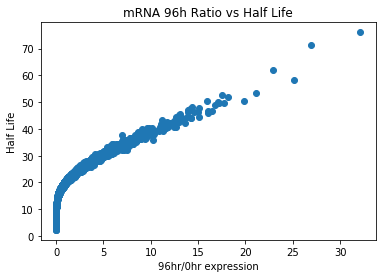

In [6]:
file = open("merged_data.txt", "r")

hl_list = []
expr_96_list = []
for line in file:
    if line[0] == '#': continue
    line = line.rstrip('\n')      
    line = line.split()
    hl_list.append(float(line[6]))
    expr_96_list.append(float(line[4]))
    
fig = plt.figure()
ax = plt.gca()
ax.scatter(expr_96_list, hl_list)

plt.title("mRNA 96h Ratio vs Half Life")
plt.xlabel("96hr/0hr expression")
plt.ylabel("Half Life")
plt.show()

We see that the relationship between the 96 hour expression ratio and the half life are closely related in a logrithmic fashion. Let's take a look at the relationshop when we plot in log scale.

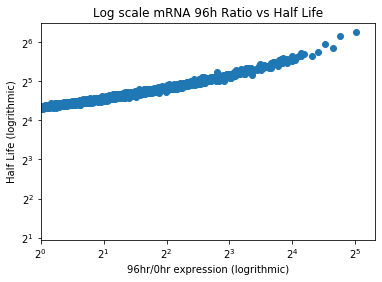

In [7]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(expr_96_list, hl_list)
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax.set_xlim(left=1, right=40)
plt.title("Log scale mRNA 96h Ratio vs Half Life")
plt.xlabel("96hr/0hr expression (logrithmic)")
plt.ylabel("Half Life (logrithmic)")
plt.show()

Indeed, we see that the relationship between the logscales of half-life and expression ratio is almost perfectly linear. If we do some thinking, this offers an alternative explanation for why Moriarty got the results that he did. For a living animal, the amount of mRNA expression in TPM depends on a balance between the synthesis rate and the half-life for a particular mRNA. If we assume that all mRNA synthesis stops at the time of death, as we beleive should be the case, then the ratio of mRNA at t=0 vs time after death would depend only on the half-life. Now if we think about the fact that we are measuring mRNA in TPMs, which is a relative measure, then we will realize that the *relative* amount of mRNA for an mRNA with a long-half life will go up compared to mRNA with a short half-life. Therefore, even if the overall counts of mRNA are going down after death, the relative amounts may be going up, as is the case for mRNA with very long half-lives. Thus, we have an alternative, and much more likely, explanation for the seemingly strange results of Moriarties expirement, 
